In [92]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numpy import pi as π
from scipy.integrate import quad, simps

In [2]:
from scipy.stats import truncexpon

In [3]:
x = 3*np.random.normal(size=10000) + 3

In [4]:
def normal(x,λ,σ):
    return 1.0/np.sqrt(2*π*σ**2)*np.exp(-(x-λ)**2/(2*σ**2))

In [ ]:
tx = np.linspace(-10,10,1000)
plt.plot(tx,normal(tx,3,3))
plt.hist(x, density=True, bins=50) ;

In [81]:
def trunc_exp(x,b,scale):
    return np.exp(-x/scale)/(1.0-np.exp(-b/scale))/scale

In [159]:
b = 3
scale = 1/2
r = truncexpon.rvs(b=b/scale,scale=scale,size=10000000)

tr = np.linspace(0,2*b,1000)

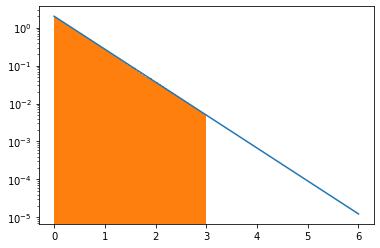

In [160]:
plt.plot(tr,trunc_exp(tr,b,scale));
plt.hist(r, density=True, bins=50);
plt.yscale('log')

In [84]:
x = 0
b = 1
scale = 2
print("Homemade: %.8f"%(trunc_exp(x,b,scale)))
print("truncexpon.pdf: %.8f"%truncexpon.pdf(x,b,scale=scale))
print("truncexpon.pdf: %.8f"%truncexpon.pdf(x,b/scale,scale=scale))

Homemade: 1.27074704
truncexpon.pdf: 0.79098835
truncexpon.pdf: 1.27074704


1.000015086006184
1.000000989434741


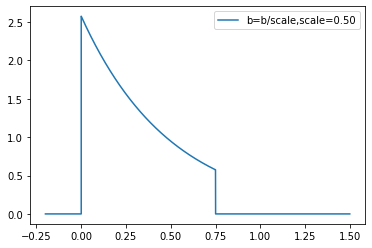

In [157]:
b = 0.75
x = np.linspace(-0.2,2*b,100000)
scale = 1/2

y1 = truncexpon.pdf(x,b,scale=scale)
y2 = truncexpon.pdf(x,b/scale,scale=scale)

# Check normalizations
print(simps(y1,x))
print(simps(y2,x))

#plt.plot(x,y1,label="b=b,scale=%.2f"%scale)
plt.plot(x,y2,label="b=b/scale,scale=%.2f"%scale)
plt.legend();